In [2]:
import os
import cv2
import numpy as np

# Function to load and preprocess images
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if img_path.endswith(".jpg") or img_path.endswith(".png"):  # Filter image files
            # Load and preprocess image
            img = cv2.imread(img_path)
            img = cv2.resize(img, (224, 224))  # Resize image to 224x224
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            # Append image and label to lists
            images.append(img)
            labels.append(label)
    return images, labels

# Paths to folders containing images
normal_folder = "artifacts/data_ingestion/kidney-ct-scan-image/Normal"
tumor_folder = "artifacts/data_ingestion/kidney-ct-scan-image/Tumor"

# Load normal images and assign label 0
normal_images, normal_labels = load_images_from_folder(normal_folder, 0)

# Load tumor images and assign label 1
tumor_images, tumor_labels = load_images_from_folder(tumor_folder, 1)

# Combine normal and tumor images and labels
X_test = np.array(normal_images + tumor_images)
y_test = np.array(normal_labels + tumor_labels)

# Convert labels to one-hot encoding (optional)
# y_test = np.eye(2)[y_test]

# Shuffle X_test and y_test in the same order
shuffle_indices = np.random.permutation(len(X_test))
X_test = X_test[shuffle_indices]
y_test = y_test[shuffle_indices]

# Normalize pixel values to range [0, 1]
X_test = X_test.astype('float32') / 255.0

# Print shapes of X_test and y_test
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_test shape: (7360, 224, 224, 3)
y_test shape: (7360,)


In [3]:
type(X_test)

numpy.ndarray

In [4]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the model
model = load_model('artifacts/training/model.h5')

# Load the dataset
X_test = X_test  # Your test dataset features
y_test = y_test 

In [5]:
y_pred = model.predict(X_test)

230/230 [==============================] - 698s 3s/step


In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, r2_score

In [8]:
accuracy = accuracy_score(y_test, y_pred.argmax(axis=1))
print("Accuracy:", accuracy)

Accuracy: 0.9285326086956521


Confusion Matrix:
 [[4818  259]
 [ 267 2016]]


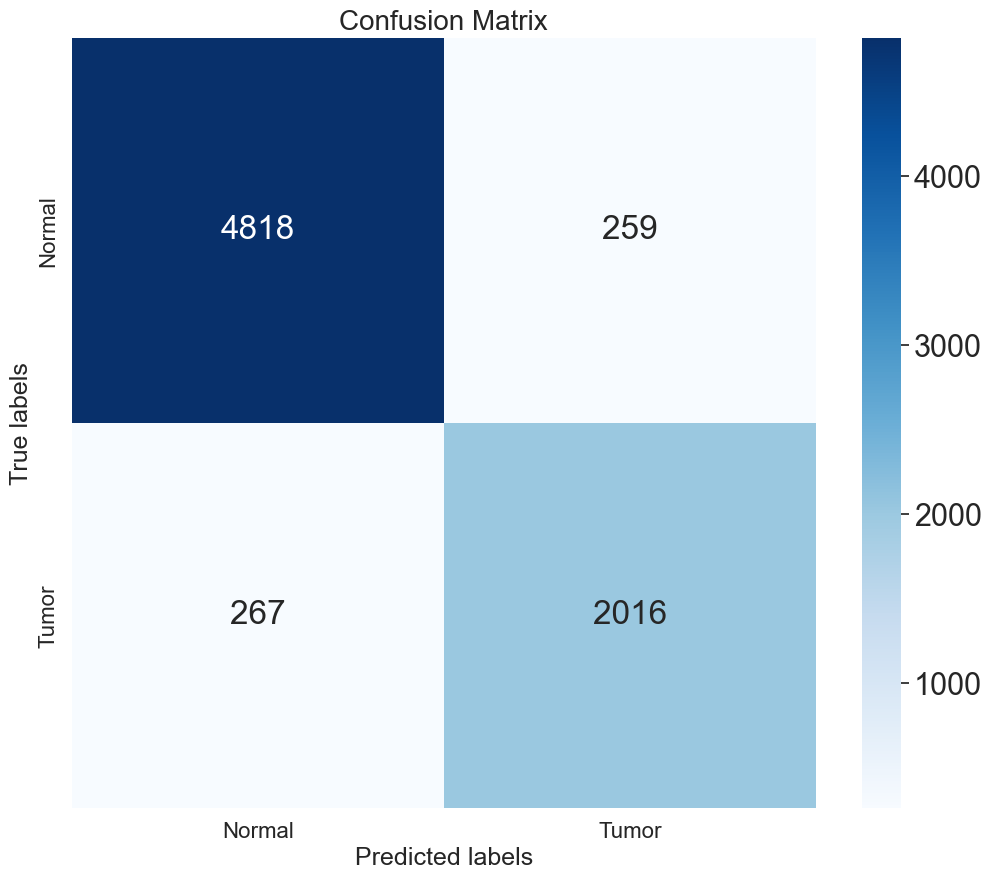

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred.argmax(axis=1))
print("Confusion Matrix:\n", cm)
classes = ['Normal', 'Tumor']

# Set the font scale
sns.set(font_scale=2)

# Plot confusion matrix with seaborn heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Add labels, title, and axis ticks
plt.xlabel('Predicted labels', fontsize=18)
plt.ylabel('True labels', fontsize=18)
plt.title('Confusion Matrix', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Display the plot
plt.show()

In [9]:
precision = precision_score(y_test, y_pred.argmax(axis=1))
print("Precision:", precision)

Precision: 0.8861538461538462


In [10]:
recall = recall_score(y_test, y_pred.argmax(axis=1))
print("Recall:", recall)

Recall: 0.8830486202365309
